In [1]:
import xarray as xr
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
tasmax_file = "data/tasmaxAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-ALPX-3-1991-2020_day_20150101-20191231.nc"
tasmax_ds = xr.open_dataset(f"../{tasmax_file}")

tasmax_ds

<xarray.Dataset> Size: 2GB
Dimensions:       (time: 1826, bnds: 2, y: 450, x: 461, nv4: 4)
Coordinates:
  * time          (time) datetime64[ns] 15kB 2015-01-01T12:00:00 ... 2019-12-...
  * y             (y) float64 4kB 300.0 302.5 305.0 ... 1.42e+03 1.422e+03
  * x             (x) float64 4kB 307.5 310.0 312.5 ... 1.455e+03 1.458e+03
    lon           (y, x) float64 2MB ...
    lat           (y, x) float64 2MB ...
Dimensions without coordinates: bnds, nv4
Data variables:
    time_bnds     (time, bnds) datetime64[ns] 29kB ...
    lon_bnds      (y, x, nv4) float64 7MB ...
    lat_bnds      (y, x, nv4) float64 7MB ...
    tasmaxAdjust  (time, y, x) float32 2GB ...
Attributes: (12/69)
    title:                         CNRM-AROME46t1 model output corrected over...
    summary:                       Data were post-processed by the Météo-Fran...
    id:                            hdl:21.14103/469c733d-7acb-4666-bb4a-bf730...
    Conventions:                   CF-1.11 ACDD-1.3
    standard_name_vocabulary:      CF Standard Name Table v81
    input_domain:                  Extended Alps
    ...                            ...
    date_created:                  2025-11-17T16:15:55.306469
    product:                       bias-adjusted output
    license:                       https://cordex.org/data-access/cordex-cmip...
    product_version:               v1
    comment:                       Preliminary data released in the Fall 2025...
    keywords:                      temperature, climate, France, maximal near...

In [3]:
# General info on the data 
print(tasmax_ds.info, '\n')

# Get the list of variables
print(tasmax_ds.data_vars, '\n')

# Get the list of dimensions
print(tasmax_ds.coords, '\n')

# Get info on time
print(tasmax_ds.time)

<bound method Dataset.info of <xarray.Dataset> Size: 2GB
Dimensions:       (time: 1826, bnds: 2, y: 450, x: 461, nv4: 4)
Coordinates:
  * time          (time) datetime64[ns] 15kB 2015-01-01T12:00:00 ... 2019-12-...
  * y             (y) float64 4kB 300.0 302.5 305.0 ... 1.42e+03 1.422e+03
  * x             (x) float64 4kB 307.5 310.0 312.5 ... 1.455e+03 1.458e+03
    lon           (y, x) float64 2MB ...
    lat           (y, x) float64 2MB ...
Dimensions without coordinates: bnds, nv4
Data variables:
    time_bnds     (time, bnds) datetime64[ns] 29kB ...
    lon_bnds      (y, x, nv4) float64 7MB ...
    lat_bnds      (y, x, nv4) float64 7MB ...
    tasmaxAdjust  (time, y, x) float32 2GB ...
Attributes: (12/69)
    title:                         CNRM-AROME46t1 model output corrected over...
    summary:                       Data were post-processed by the Météo-Fran...
    id:                            hdl:21.14103/469c733d-7acb-4666-bb4a-bf730...
    Conventions:                   CF

In [4]:
subset = tasmax_ds[['tasmaxAdjust']].sel(time = slice("2019-01-01", "2019-12-31"))
subset

<xarray.Dataset> Size: 306MB
Dimensions:       (time: 365, y: 450, x: 461)
Coordinates:
  * time          (time) datetime64[ns] 3kB 2019-01-01T12:00:00 ... 2019-12-3...
  * y             (y) float64 4kB 300.0 302.5 305.0 ... 1.42e+03 1.422e+03
  * x             (x) float64 4kB 307.5 310.0 312.5 ... 1.455e+03 1.458e+03
    lon           (y, x) float64 2MB ...
    lat           (y, x) float64 2MB ...
Data variables:
    tasmaxAdjust  (time, y, x) float32 303MB ...
Attributes: (12/69)
    title:                         CNRM-AROME46t1 model output corrected over...
    summary:                       Data were post-processed by the Météo-Fran...
    id:                            hdl:21.14103/469c733d-7acb-4666-bb4a-bf730...
    Conventions:                   CF-1.11 ACDD-1.3
    standard_name_vocabulary:      CF Standard Name Table v81
    input_domain:                  Extended Alps
    ...                            ...
    date_created:                  2025-11-17T16:15:55.306469
    product:                       bias-adjusted output
    license:                       https://cordex.org/data-access/cordex-cmip...
    product_version:               v1
    comment:                       Preliminary data released in the Fall 2025...
    keywords:                      temperature, climate, France, maximal near...

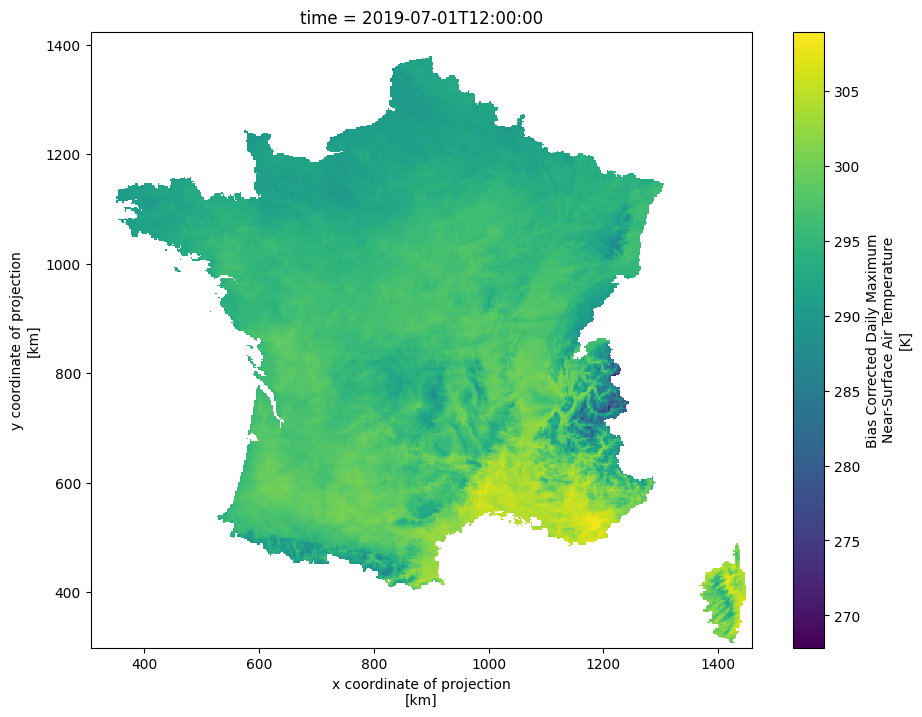

In [5]:
target_time = "2019-07"
subset_T = subset.tasmaxAdjust.sel(time = target_time, method = 'nearest')  

## Plot 
subset_T.plot(size = 8)

In [6]:
subset.to_dataframe().to_csv("../data/tasmaxAdjust_20190101-20191231.csv")

In [2]:
tasmax_df = pd.read_csv('../data/tasmaxAdjust_20190101-20191231.csv')
tasmax_df

,time,y,x,tasmaxAdjust,lon,lat
0,2019-01-01 12:00:00,300.0,307.5,NaN,-4.1256,41.038
1,2019-01-01 12:00:00,300.0,310.0,NaN,-4.0961,41.041
2,2019-01-01 12:00:00,300.0,312.5,NaN,-4.0666,41.044
3,2019-01-01 12:00:00,300.0,315.0,NaN,-4.0371,41.046
4,2019-01-01 12:00:00,300.0,317.5,NaN,-4.0076,41.048
...,...,...,...,...,...,...
75719245,2019-12-31 12:00:00,1422.5,1447.5,NaN,10.3995,51.375
75719246,2019-12-31 12:00:00,1422.5,1450.0,NaN,10.4353,51.373
75719247,2019-12-31 12:00:00,1422.5,1452.5,NaN,10.4711,51.372
75719248,2019-12-31 12:00:00,1422.5,1455.0,NaN,10.5068,51.370


In [3]:
# Supprime ce qui est dans la mer ?
tasmax_df = tasmax_df.dropna()
tasmax_df

,time,y,x,tasmaxAdjust,lon,lat
1829,2019-01-01 12:00:00,307.5,1422.5,285.56863,9.1627,41.394
1830,2019-01-01 12:00:00,307.5,1425.0,285.47030,9.1925,41.393
1831,2019-01-01 12:00:00,307.5,1427.5,285.74234,9.2224,41.392
2289,2019-01-01 12:00:00,310.0,1420.0,285.19183,9.1345,41.418
2290,2019-01-01 12:00:00,310.0,1422.5,285.40298,9.1644,41.416
...,...,...,...,...,...,...
75710265,2019-12-31 12:00:00,1375.0,895.0,272.79790,2.4836,51.051
75710266,2019-12-31 12:00:00,1375.0,897.5,272.72842,2.5192,51.052
75710267,2019-12-31 12:00:00,1375.0,900.0,272.67416,2.5548,51.053
75710727,2019-12-31 12:00:00,1377.5,897.5,272.77512,2.5182,51.074


In [4]:
tasmax_df['time'] = pd.to_datetime(tasmax_df['time'], yearfirst=True)
tasmax_df

/var/folders/q4/hb535nv14kx3r_6j_jr93thh0000gq/T/ipykernel_95815/727148566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tasmax_df['time'] = pd.to_datetime(tasmax_df['time'], yearfirst=True)


,time,y,x,tasmaxAdjust,lon,lat
1829,2019-01-01 12:00:00,307.5,1422.5,285.56863,9.1627,41.394
1830,2019-01-01 12:00:00,307.5,1425.0,285.47030,9.1925,41.393
1831,2019-01-01 12:00:00,307.5,1427.5,285.74234,9.2224,41.392
2289,2019-01-01 12:00:00,310.0,1420.0,285.19183,9.1345,41.418
2290,2019-01-01 12:00:00,310.0,1422.5,285.40298,9.1644,41.416
...,...,...,...,...,...,...
75710265,2019-12-31 12:00:00,1375.0,895.0,272.79790,2.4836,51.051
75710266,2019-12-31 12:00:00,1375.0,897.5,272.72842,2.5192,51.052
75710267,2019-12-31 12:00:00,1375.0,900.0,272.67416,2.5548,51.053
75710727,2019-12-31 12:00:00,1377.5,897.5,272.77512,2.5182,51.074


In [5]:
mask_july = (tasmax_df['time'] >= "2019-07-01 00:00:00") & (tasmax_df['time'] <= "2019-07-01 00:00:00")
tasmax_july_df = tasmax_df[mask_july]
tasmax_july_df

,time,y,x,tasmaxAdjust,lon,lat


In [6]:
# Visualisation Plotly
fig = px.scatter_map(data_frame=tasmax_july_df, lat='lat', lon='lon', color="tasmaxAdjust")
fig.show()